###  DATA EXTRACTION

In [1]:
# STEP1 - DATA EXTRACTION

import pandas as pd
import numpy as np 

initial_trainset = pd.read_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\application_train.csv')
# r (raw data indication) is necessary here otherwise, python will consider backslash as escape character. Eg: \t implies tab \n implies new line 

print ("Train dataset shape :")
print (initial_trainset.shape)
initial_trainset.head()


Train dataset shape :
(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
initial_testset = pd.read_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\application_test.csv')

print ("Test dataset shape :")
print (initial_testset.shape)
initial_testset.head()

Test dataset shape :
(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


 - From above shape details, we can infer that the provided test dataset is 1/6th of the size of the training dataset.

 - We shall first align both train & test datasets on the basis of common columns so that we do not spend time on pre-processing columns that we later need to remove/drop.

 - Before we align, extract Target var from train dataset so that it does not get implicitly removed during the process of aligning with test dataset which does not contain target var.

In [3]:
# Aligning train & test set columns

target_var=initial_trainset['TARGET']
initial_trainset, initial_testset = initial_trainset.align(initial_testset, join="inner", axis=1)
initial_trainset['TARGET'] = target_var

print('Aligned Train dataset shape is : ', initial_trainset.shape)
print('Aligned Test dataset shape is : ', initial_testset.shape)

Aligned Train dataset shape is :  (307511, 122)
Aligned Test dataset shape is :  (48744, 121)


 - Observe that no column in train or test dataset got removed. It implies that it is the same set of columns that are present in both datasets. Also, with align method, order of columns between the two datasets got synchronized. 

###  DATA EXPLORATION

- Now check for bias in target variable distribution in the train dataset. This is to check if any oversampling or undersampling techniques need to be applied to reduce biased outcomes.

In [4]:
print ('Bias in target column of Trainset :')
initial_trainset['TARGET'].value_counts(normalize=True)  
# 'normalize = True' gives relative frequencies (i.e. %) of each unique value in the column 

Bias in target column of Trainset :


0    0.919271
1    0.080729
Name: TARGET, dtype: float64

  - 92% data is for non-defaulters and 8% for defaulters. It is a highly biased dataset and should ideally be treated. However, for now, let's leave it as-is. We shall revisit this if the model performance is too low.
  
  - Since this is a prediction problem, testset does not contain target var. Hence checking for bias in testset is not applicable in this case. 
  
  - For further data exploration, we need to check & treat the following-
         - Check the various data type of columns present in the data set. 
         - Impute missing values for both numeric & categorical vars.
         - Analyze outliers and drop them to make the model more regularized (even for genuinely valid outlier data)
         - Perform one hot encoding of all categorical vars (i.e. create dummy numerical vars)
         - Standardize all numerical vars 
       

In [5]:
# For imputation we first need to know the various types of vars present in the dataset.

df_datatypes= pd.DataFrame(initial_trainset.dtypes.value_counts()).reset_index()
df_datatypes.columns = ['DataType','Count']
print(df_datatypes)

  DataType  Count
0  float64     65
1    int64     41
2   object     16


 - Let us first check what kind of values are present in columns of "Object" datatype.

In [6]:
# Separating categorical & numerical vars for convenience of imputation

cat_trainset = initial_trainset.loc[ : , initial_trainset.dtypes == np.object]
cat_testset = initial_testset.loc[ : , initial_testset.dtypes == np.object]
cat_trainset.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


In [7]:
# Separating numerical vars

float_trainset = initial_trainset.loc[ : , initial_trainset.dtypes == np.float64 ]
int_trainset = initial_trainset.loc[ : , initial_trainset.dtypes == np.int64]
num_trainset = pd.concat([float_trainset, int_trainset], axis = 1)


float_testset = initial_testset.loc[ : , initial_testset.dtypes == np.float64 ]
int_testset = initial_testset.loc[ : , initial_testset.dtypes == np.int64]
num_testset = pd.concat([float_testset, int_testset], axis = 1)

num_trainset.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,...,0,0,0,0,0,0,0,0,0,1
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,...,0,0,0,0,0,0,0,0,0,0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,...,0,0,0,0,0,0,0,0,0,0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,...,0,0,0,0,0,0,0,0,0,0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,0.322738,...,0,0,0,0,0,0,0,0,0,0


### Treating Missing Values

In [8]:
# check missing values in both categorical & numeric vars.
# single - sum() will return sum of null values per each column
# double - sum().sum() will return total null values across all cols of dataframe

print ("Number of missing values in categorical columns of train set:")
missing = pd.DataFrame((cat_trainset.isnull().sum()/cat_trainset.shape[0])*100).reset_index()
missing.columns = ['Column_name', 'Percent_missing']
Train_cat_missing = missing.loc[missing['Percent_missing']>60]
print (Train_cat_missing)
print ('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')

print ("Number of missing values in categorical columns of TEST set:")
missing = pd.DataFrame((cat_testset.isnull().sum()/cat_testset.shape[0])*100).reset_index()
missing.columns = ['Column_name', 'Percent_missing']
Test_cat_missing = missing.loc[missing['Percent_missing']>60]
print (Train_cat_missing)
print ('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')

print ("Number of missing values in numeric columns of train set :")
missing = pd.DataFrame((num_trainset.isnull().sum()/num_trainset.shape[0])*100).reset_index()
missing.columns = ['Column_name', 'Percent_missing']
Train_num_missing = missing.loc[missing['Percent_missing']>60]
print (Train_num_missing)
print ('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')

print ("Number of missing values in numeric columns of TEST set :")
missing = pd.DataFrame((num_testset.isnull().sum()/num_testset.shape[0])*100).reset_index()
missing.columns = ['Column_name', 'Percent_missing']
Test_num_missing = missing.loc[missing['Percent_missing']>60]
print (Test_num_missing)
print ('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')

Number of missing values in categorical columns of train set:
           Column_name  Percent_missing
12  FONDKAPREMONT_MODE        68.386172
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Number of missing values in categorical columns of TEST set:
           Column_name  Percent_missing
12  FONDKAPREMONT_MODE        68.386172
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Number of missing values in numeric columns of train set :
                 Column_name  Percent_missing
6                OWN_CAR_AGE        65.990810
14           YEARS_BUILD_AVG        66.497784
15            COMMONAREA_AVG        69.872297
19             FLOORSMIN_AVG        67.848630
21      LIVINGAPARTMENTS_AVG        68.354953
23   NONLIVINGAPARTMENTS_AVG        69.432963
28          YEARS_BUILD_MODE        66.497784
29           COMMONAREA_MODE        69.872297
33            FLOORSMIN_MODE        67.848630
35     LIVINGAPARTMENTS_MODE        68.354953
37  NONLIVINGAPARTMENTS_MODE        69.432963
42          YE

  - It is ideal to remove columns that have more than 60% of missing values in both train & test datasets, because even if we impute those missing values, data is not real time data. Therefore model performance wont fit real time unseen data well. 
  - From above result we can remove "FONDKAPREMONT_MODE" column from categorical train & test sets
  - For numeric missing values, we can remove the 16 columns listed in above result set. 

In [9]:
# removing columns that have more than 60% missing values in both train & test data sets

print('For CATEGORICAL TRAINSET-')
print('shape BEFORE drop is : {}'.format(cat_trainset.shape))
cat_trainset.drop(Train_cat_missing['Column_name'], axis=1, inplace=True)
print('shape AFTER drop is : {}'.format(cat_trainset.shape))
print ('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')

print('For CATEGORICAL TESTSET-')
print('shape BEFORE drop is : {}'.format(cat_testset.shape))
cat_testset.drop(Test_cat_missing['Column_name'], axis = 1, inplace=True)
print('shape AFTER drop is : {}'.format(cat_testset.shape))
print ('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')

print('For NUMERICAL TRAINSET-')
print('shape BEFORE drop is : {}'.format(num_trainset.shape))
num_trainset.drop(Train_num_missing['Column_name'], axis = 1, inplace=True)
print('shape AFTER drop is : {}'.format(num_trainset.shape))
print ('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')

print('For NUMERICAL TESTSET-')
print('numerical trainset: {} '.format (num_testset.shape))
num_testset.drop(Test_num_missing['Column_name'], axis = 1, inplace=True)
print('numerical testset: {} '.format (num_testset.shape))


For CATEGORICAL TRAINSET-
shape BEFORE drop is : (307511, 16)
shape AFTER drop is : (307511, 15)
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
For CATEGORICAL TESTSET-
shape BEFORE drop is : (48744, 16)
shape AFTER drop is : (48744, 15)
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
For NUMERICAL TRAINSET-
shape BEFORE drop is : (307511, 106)


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


shape AFTER drop is : (307511, 90)
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
For NUMERICAL TESTSET-
numerical trainset: (48744, 105) 
numerical testset: (48744, 89) 


  - Notice that num test set has one column less than its num train set. This is because of the absence of 'TARGET' var in the test set. We shall deal with this in a while. 
  - Therefore, before using Impute library to transform all missing values in test set using impute parameters calculated on the basis of trainset, we should make sure the columns in train & test set match. Otherwise it will throw error. 

### Back to Missing Value Imputation

In [10]:
# The only non-common column between train & test sets is 'TARGET'. Extract and handle this column separately for sometime. 
# During use of align() method, we already stored target data in 'target_var'. We shall re-use this now.

num_trainset.drop(['TARGET'], axis =1, inplace=True)
print(num_trainset.shape)
print(num_testset.shape)


(307511, 89)
(48744, 89)


In [11]:
# Check if target var has any missing values. If yes, remove those rows.

target_var.isnull().sum()


0

  -  There are no missing values in target variable. 

In [12]:
#Storing column names  [this is only for back up purpose]

Cols_in_cat_train = cat_trainset.columns
Cols_in_cat_test = cat_testset.columns
Cols_in_num_train = num_trainset.columns
Cols_in_num_test = columns= num_testset.columns

In [13]:
# Imputing missing values in cat & num vars

from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')
imputed_cat_trainset = pd.DataFrame(impute.fit_transform(cat_trainset),columns=cat_trainset.columns).astype(cat_trainset.dtypes.to_dict()) # this is to impute cat vars with most frequently occurring value in that column.
imputed_cat_testset = pd.DataFrame(impute.transform(cat_testset), columns = cat_testset.columns).astype(cat_testset.dtypes.to_dict())

impute = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
imputed_num_trainset = pd.DataFrame(impute.fit_transform(num_trainset), columns = num_trainset.columns).astype(num_trainset.dtypes.to_dict()) # this is to impute num vars with mean of the column.
imputed_num_testset = pd.DataFrame(impute.transform(num_testset), columns= num_testset.columns).astype(num_trainset.dtypes.to_dict())


Time taken to impute missing values using SimpleImputer method is 64.75418051083882


In [14]:
# checking if imputation of all missing values is successful or not. 

print('trainset:')
print ("Number of missing values in categorical columns AFTER IMPUTATION:")
print (imputed_cat_trainset.isnull().sum().sum()) 
print ('Number of missing values in numeric columns AFTER IMPUTATION:')
print (imputed_num_trainset.isnull().sum().sum())

print('Testset:')
print ("Number of missing values in categorical columns AFTER IMPUTATION:")
print (imputed_cat_testset.isnull().sum().sum()) 
print ('Number of missing values in numeric columns AFTER IMPUTATION:')
print (imputed_num_testset.isnull().sum().sum())


trainset:
Number of missing values in categorical columns AFTER IMPUTATION:
0
Number of missing values in numeric columns AFTER IMPUTATION:
0
Testset:
Number of missing values in categorical columns AFTER IMPUTATION:
0
Number of missing values in numeric columns AFTER IMPUTATION:
0


  - This shows that imputation of missing values across all cat & num vars was successful on both train & test sets

In [15]:
#Since use of SimpleImputer is taking too long to run, saving imputed datasets to local drive. 
# will import these to save time for future runs.

#exporting imputed datasets
imputed_cat_trainset.to_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\imputed_cat_trainset.csv')
imputed_cat_testset.to_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\imputed_cat_testset.csv')
imputed_num_trainset.to_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\imputed_num_trainset.csv')
imputed_num_testset.to_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\imputed_num_testset.csv')


In [17]:
'''
# USE THIS CODE TO AVOID RUNNING ALL ABOVE CELLS OF CODE 

import pandas as pd
import numpy as np 

initial_trainset = pd.read_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\application_train.csv')
imputed_cat_trainset = pd.read_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\imputed_cat_trainset.csv')
imputed_cat_testset = pd.read_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\imputed_cat_testset.csv')
imputed_num_trainset = pd.read_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\imputed_num_trainset.csv')
imputed_num_testset = pd.read_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\imputed_num_testset.csv')

# drop 1st column for imputed test sets as index column got added while exporting those files. Hence while importing we must remove it.
imputed_cat_trainset.drop(imputed_cat_trainset.columns[0], axis = 1, inplace = True)
imputed_cat_testset.drop(imputed_cat_testset.columns[0], axis = 1, inplace = True)
imputed_num_trainset.drop(imputed_num_trainset.columns[0], axis = 1, inplace = True)
imputed_num_testset.drop(imputed_num_testset.columns[0], axis = 1, inplace = True)

print ("imputed_cat_trainset shape : {}".format(imputed_cat_trainset.shape))
print ("imputed_cat_testset shape : {}".format(imputed_cat_testset.shape))
print ("imputed_num_trainset shape : {}".format(imputed_num_trainset.shape))
print ("imputed_num_testset shape : {}".format(imputed_num_testset.shape))

target_var=initial_trainset['TARGET']
print(target_var.head())

#checking if any missing values got introduced while exporting/importing
print (imputed_cat_trainset.isnull().sum().sum()) 
print (imputed_cat_testset.isnull().sum().sum()) 
print (imputed_num_trainset.isnull().sum().sum()) 
print (imputed_num_testset.isnull().sum().sum()) 
'''

imputed_cat_trainset shape : (307511, 15)
imputed_cat_testset shape : (48744, 15)
imputed_num_trainset shape : (307511, 89)
imputed_num_testset shape : (48744, 89)
0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64
0
0
0
0


  ### Outlier Identification
   
  -  We could visualize data (using box plots) or summary statistics to calculate how far the min & max data is from its mean & neighbouring data. Any extreme data can be removed or imputed even if it is genuinely valid in real world. This will help regularize our model and reduces a skewed or biased outcome. 

    FLAG_EMAIL
50           0
51           0
52           0
53           0
54           0
55           1
56           0
57           0
58           0
59           0
60           0
61           1
count    307511.000000
mean          0.056720
std           0.231307
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_EMAIL, dtype: float64


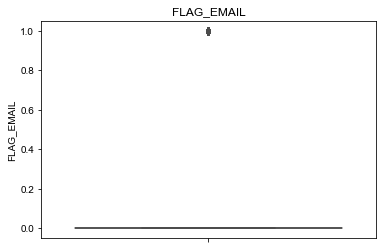

In [18]:
# for each of the above identified cols, let us visualize summary statistics & visualize data using plots

from pprint import pprint 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

pprint(imputed_num_trainset.loc[ 50:61, ['FLAG_EMAIL']]) # randomly picking data values in rows 50 to 60 to see what kind of data exist
pprint(imputed_num_trainset['FLAG_EMAIL'].describe())

plt.title('FLAG_EMAIL')
sns.set(style="whitegrid")
sns.boxplot( y=imputed_num_trainset['FLAG_EMAIL'] )


 - From above results we infer - 
      1. Data in FLAG_EMAIL column contains only 0s and 1s. So question of outlier does not apply in this case. 
      2. For this kind of data, we cannot plot the distribution as well. Hence the plots above are uninterpretable. 
 - Therefore, we must ignore all categorical vars and numerical vars with classes, and only look for outliers on continuous numeric values. 
 - For this purpose, let us take sort all columns in ascending order and look at the top 10 & bottom 10 values. If there is huge difference in the spread of values then those can be termed as outliers.    

In [19]:
for col in imputed_num_trainset.columns:
    print('Column = {}, Mean = {}, Min = {}, Max = {}'.format(col, imputed_num_trainset[col].mean(), imputed_num_trainset[col].min(), imputed_num_trainset[col].max() ))
    print(pd.DataFrame(imputed_num_trainset[col].sort_values().head(n=6)).reset_index()) 
    print(pd.DataFrame(imputed_num_trainset[col].sort_values().tail(n=6)).reset_index())
    print ('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')

# we retrieved data as new DF with col1 as original index value. This will help in referencing the right row for removing/imputing the outlier data later on. 

Column = AMT_INCOME_TOTAL, Mean = 168797.9192969845, Min = 25650.0, Max = 117000000.0
    index  AMT_INCOME_TOTAL
0    1678           25650.0
1   20727           25650.0
2  240137           26100.0
3  186643           26100.0
4  246104           26100.0
5  132707           26460.0
    index  AMT_INCOME_TOTAL
0  204564         4500000.0
1  131127         6750000.0
2   77768         9000000.0
3  246858        13500000.0
4  203693        18000090.0
5   12840       117000000.0
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Column = AMT_CREDIT, Mean = 599025.9997057016, Min = 45000.0, Max = 4050000.0
    index  AMT_CREDIT
0   51295     45000.0
1   43617     45000.0
2   72466     45000.0
3   91081     45000.0
4  136953     45000.0
5   64895     45000.0
    index  AMT_CREDIT
0   14852   4050000.0
1   17948   4050000.0
2  110459   4050000.0
3  133766   4050000.0
4  120757   4050000.0
5  119681   4050000.0
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Column = AMT_ANNUITY, Mean = 27108.573909183

    index  LANDAREA_AVG
0  238596           0.0
1  250384           0.0
2   59660           0.0
3  232361           0.0
4   11244           0.0
5  220854           0.0
    index  LANDAREA_AVG
0   63931           1.0
1  136159           1.0
2   17729           1.0
3  122526           1.0
4  229043           1.0
5  106802           1.0
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Column = LIVINGAREA_AVG, Mean = 0.1073990193326269, Min = 0.0, Max = 1.0
    index  LIVINGAREA_AVG
0  168681             0.0
1    4004             0.0
2  280826             0.0
3  295839             0.0
4  246765             0.0
5  287906             0.0
    index  LIVINGAREA_AVG
0  120887             1.0
1  112279             1.0
2  287031             1.0
3  141185             1.0
4   79043             1.0
5   67714             1.0
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Column = NONLIVINGAREA_AVG, Mean = 0.028357757075671827, Min = 0.0, Max = 1.0
    index  NONLIVINGAREA_AVG
0       0                0.0

5   92250             1.0
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Column = FLOORSMAX_MEDI, Mean = 0.22589659009237328, Min = 0.0, Max = 1.0
    index  FLOORSMAX_MEDI
0  203520             0.0
1  153291             0.0
2   19198             0.0
3  217146             0.0
4   19193             0.0
5  173737             0.0
    index  FLOORSMAX_MEDI
0  163566             1.0
1  141185             1.0
2    1586             1.0
3  281600             1.0
4  221202             1.0
5   71519             1.0
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Column = LANDAREA_MEDI, Mean = 0.06716874904930549, Min = 0.0, Max = 1.0
    index  LANDAREA_MEDI
0  192728            0.0
1  243136            0.0
2  243140            0.0
3  243147            0.0
4  130531            0.0
5  130492            0.0
    index  LANDAREA_MEDI
0  259714            1.0
1  183250            1.0
2  275601            1.0
3   38580            1.0
4  179494            1.0
5  185561            1.0
_ _ _ _ _ _ _ _ _ _ _

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Column = AMT_REQ_CREDIT_BUREAU_QRT, Mean = 0.2654741495984415, Min = 0.0, Max = 261.0
    index  AMT_REQ_CREDIT_BUREAU_QRT
0       0                        0.0
1  186952                        0.0
2  186953                        0.0
3  186954                        0.0
4  186956                        0.0
5  186957                        0.0
    index  AMT_REQ_CREDIT_BUREAU_QRT
0   16194                        8.0
1  127569                        8.0
2   62052                        8.0
3  289714                        8.0
4  253541                       19.0
5  239474                      261.0
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Column = AMT_REQ_CREDIT_BUREAU_YEAR, Mean = 1.8999744353227703, Min = 0.0, Max = 25.0
    index  AMT_REQ_CREDIT_BUREAU_YEAR
0  153755                         0.0
1   66417                         0.0
2   66416                         0.0
3  191305                         0.0
4  191306                   

    index  LIVE_REGION_NOT_WORK_REGION
0       0                            0
1  202901                            0
2  202900                            0
3  202899                            0
4  202898                            0
5  202897                            0
    index  LIVE_REGION_NOT_WORK_REGION
0  293421                            1
1  138074                            1
2  181962                            1
3  273387                            1
4   13483                            1
5  150516                            1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Column = REG_CITY_NOT_LIVE_CITY, Mean = 0.07817281333025486, Min = 0, Max = 1
    index  REG_CITY_NOT_LIVE_CITY
0       0                       0
1  200879                       0
2  200878                       0
3  200877                       0
4  200876                       0
5  200875                       0
    index  REG_CITY_NOT_LIVE_CITY
0  280000                       1
1  279999               

    index  FLAG_DOCUMENT_16
0       0                 0
1  204512                 0
2  204511                 0
3  204510                 0
4  204509                 0
5  204508                 0
    index  FLAG_DOCUMENT_16
0    8567                 1
1  111413                 1
2  175888                 1
3  199459                 1
4   73979                 1
5   49174                 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Column = FLAG_DOCUMENT_17, Mean = 0.0002666571277125046, Min = 0, Max = 1
    index  FLAG_DOCUMENT_17
0       0                 0
1  204994                 0
2  204993                 0
3  204992                 0
4  204991                 0
5  204990                 0
    index  FLAG_DOCUMENT_17
0  291609                 1
1  132142                 1
2  175671                 1
3  267448                 1
4  166350                 1
5  249836                 1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Column = FLAG_DOCUMENT_18, Mean = 0.00812979047903

 - From above results we can infer that below listed columns can be considered to contain outliers and such data needs to be removed/imputed - 

- For index value = 148403, below columns may be considered as outliers. Since it is only 4 columns of the row containing 90+ cols, We can impute these with mode of respective column instead of removing the entire row. 

    1. Column = OBS_30_CNT_SOCIAL_CIRCLE   ;               
       Column value  = 348.0; 
  
    2. Column = DEF_30_CNT_SOCIAL_CIRCLE   ;               
       Column value  = 34.0; 

    3. Column =   OBS_60_CNT_SOCIAL_CIRCLE   ;             
       Column value  = 344.0; 

    4. Column = DEF_60_CNT_SOCIAL_CIRCLE    ;           
       Column value  = 24.0; 

- We have one more outlier in a different index/row - 
    1. Column = AMT_REQ_CREDIT_BUREAU_QRT ;                 
       Column value  = 261.0    ;               
       index = 239474    ;               
       use impute strategy = mean
   

In [20]:

# use this to impute outlier in row = index, column = col_name with mean of the column
 
imputed_num_trainset.at[148403, 'OBS_30_CNT_SOCIAL_CIRCLE'] = imputed_num_trainset['OBS_30_CNT_SOCIAL_CIRCLE'].median()
print ('replaced value = {}'.format(imputed_num_trainset.loc[148403, 'OBS_30_CNT_SOCIAL_CIRCLE']))
print('median of column = {} is {}'.format('OBS_30_CNT_SOCIAL_CIRCLE', imputed_num_trainset['OBS_30_CNT_SOCIAL_CIRCLE'].median()))
print('\n')

imputed_num_trainset.at[148403, 'OBS_60_CNT_SOCIAL_CIRCLE'] = imputed_num_trainset['OBS_60_CNT_SOCIAL_CIRCLE'].median()
print (imputed_num_trainset.loc[148403, 'OBS_60_CNT_SOCIAL_CIRCLE'])
print('median of column = {} is {}'.format('OBS_60_CNT_SOCIAL_CIRCLE', imputed_num_trainset['OBS_60_CNT_SOCIAL_CIRCLE'].median()))
print('\n')

imputed_num_trainset.at[148403, 'DEF_30_CNT_SOCIAL_CIRCLE'] = imputed_num_trainset['DEF_30_CNT_SOCIAL_CIRCLE'].mode()
print (imputed_num_trainset.loc[148403, 'DEF_30_CNT_SOCIAL_CIRCLE'])
print('mode of column = {} is {}'.format('DEF_30_CNT_SOCIAL_CIRCLE', imputed_num_trainset['DEF_30_CNT_SOCIAL_CIRCLE'].mode()))
print('\n')

imputed_num_trainset.at[148403, 'DEF_60_CNT_SOCIAL_CIRCLE'] = imputed_num_trainset['DEF_60_CNT_SOCIAL_CIRCLE'].mode()
print (imputed_num_trainset.loc[148403, 'DEF_60_CNT_SOCIAL_CIRCLE'])
print('mode of column = {} is {}'.format('DEF_60_CNT_SOCIAL_CIRCLE', imputed_num_trainset['DEF_60_CNT_SOCIAL_CIRCLE'].mode()))
print('\n')


imputed_num_trainset.at[239474, 'AMT_REQ_CREDIT_BUREAU_QRT'] = imputed_num_trainset['AMT_REQ_CREDIT_BUREAU_QRT'].mean()
print (imputed_num_trainset.loc[239474, 'AMT_REQ_CREDIT_BUREAU_QRT'])
print('mean of column = {} is {}'.format('AMT_REQ_CREDIT_BUREAU_QRT', imputed_num_trainset['AMT_REQ_CREDIT_BUREAU_QRT'].mean()))
print(imputed_num_trainset['AMT_REQ_CREDIT_BUREAU_QRT'].dtype)

'''
# use this to delete/remove rows where column value meets specified condition. 
DataFrame.drop(index=<give row index>, columns=df[df[col_name == 1000]], axis=0, inplace=True) 
'''

replaced value = 0.0
median of column = OBS_30_CNT_SOCIAL_CIRCLE is 0.0


0.0
median of column = OBS_60_CNT_SOCIAL_CIRCLE is 0.0


0.0
mode of column = DEF_30_CNT_SOCIAL_CIRCLE is 0    0.0
dtype: float64


0.0
mode of column = DEF_60_CNT_SOCIAL_CIRCLE is 0    0.0
dtype: float64


0.2654741495984415
mean of column = AMT_REQ_CREDIT_BUREAU_QRT is 0.2646262627721174
float64


'\n# use this to delete/remove rows where column value meets specified condition. \nDataFrame.drop(index=<give row index>, columns=df[df[col_name == 1000]], axis=0, inplace=True) \n'

  - We shall let the testset outliers remain as-is to be a true reflection of realtime data.

### STEP 3 : FEATURE EXTRACTION

  - Perform one hot encoding for cat vars. 
  - Check for multi collinearity i.e. correlation between independent vars 
      Note: Random forest are not sensitive to multi collinearity. But Linear & Logistic regressions are. 
  - Calculate corr between independent vars & target var. Select the most positively correlated & most negatively correlated features with target vars.
  - Instead of calculating correlations, we could use PCA (Principal Component Analysis) or t-SNE (t-distributed Stochastic Neighbor Embedding) algorithms to extract most relevant features. 
  - For now, we shall proceed with correlation. If performance of the model is too low, then we shall try out PCA/t-SNE
    

In [21]:
# categorical features before conversion to numeric form: 

backup_cat_train=imputed_cat_trainset
backup_cat_test = imputed_cat_testset

print(imputed_cat_trainset.head())
print('\n')
print(backup_cat_train.head())


  NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_STAR

In [22]:
# check what are the various classes in each column of categorical set

print('TRAINSET CAT classes :')
for col in imputed_cat_trainset:
    print('Items in ' + col + ': ')
    print(imputed_cat_trainset[col].value_counts())
    print('___________________________________')


TRAINSET CAT classes :
Items in NAME_CONTRACT_TYPE: 
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
___________________________________
Items in CODE_GENDER: 
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
___________________________________
Items in FLAG_OWN_CAR: 
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
___________________________________
Items in FLAG_OWN_REALTY: 
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
___________________________________
Items in NAME_TYPE_SUITE: 
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
___________________________________
Items in NAME_INCOME_TYPE: 
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed    

In [23]:

print('TESTSET CAT classes :')
for col in imputed_cat_testset:
    print('Items in ' + col + ': ')
    print(imputed_cat_testset[col].value_counts())
    print('___________________________________')

TESTSET CAT classes :
Items in NAME_CONTRACT_TYPE: 
Cash loans         48305
Revolving loans      439
Name: NAME_CONTRACT_TYPE, dtype: int64
___________________________________
Items in CODE_GENDER: 
F    32678
M    16066
Name: CODE_GENDER, dtype: int64
___________________________________
Items in FLAG_OWN_CAR: 
N    32311
Y    16433
Name: FLAG_OWN_CAR, dtype: int64
___________________________________
Items in FLAG_OWN_REALTY: 
Y    33658
N    15086
Name: FLAG_OWN_REALTY, dtype: int64
___________________________________
Items in NAME_TYPE_SUITE: 
Unaccompanied      40638
Family              5881
Spouse, partner     1448
Children             408
Other_B              211
Other_A              109
Group of people       49
Name: NAME_TYPE_SUITE, dtype: int64
___________________________________
Items in NAME_INCOME_TYPE: 
Working                 24533
Commercial associate    11402
Pensioner                9273
State servant            3532
Student                     2
Unemployed            

In [24]:
# Performing one hot encoding for other multi class categorical vars. 
# Note: sklearn suggests that one hot encoder takes less memory than label binarizer()


OneHotEncoded_train_subset = pd.DataFrame()
OneHotEncoded_test_subset = pd.DataFrame()


OneHotEncoded_train_subset = pd.get_dummies(imputed_cat_trainset, columns = ['NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'] , prefix_sep = "_")
OneHotEncoded_test_subset = pd.get_dummies(imputed_cat_testset, columns =  ['NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'] , prefix_sep = "_")
    
      
print('OneHotEncoded Train shape = {}'.format(OneHotEncoded_train_subset.shape))
print('OneHotEncoded Test shape = {}'.format(OneHotEncoded_test_subset.shape))


OneHotEncoded Train shape = (307511, 136)
OneHotEncoded Test shape = (48744, 133)


In [25]:
print('OneHotEncoded_train_subset contains -')
OneHotEncoded_train_subset.head()


OneHotEncoded_train_subset contains -


,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [26]:
print('Test set after OneHotEncoding : ')
OneHotEncoded_test_subset.head()


Test set after OneHotEncoding : 


,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
'''
# SINCE WE USED GET_DUMMIES(), below LABEL ENCODER IS NO LONGER NEEDED.

# Categorical features after performing label encoding(i.e. converting binary categorical vars to numeric)

from sklearn import preprocessing

LabelEncoder = preprocessing.LabelEncoder()
LabelEncoder_count=0
LabelEncoded_train = pd.DataFrame()
LabelEncoded_test = pd.DataFrame()

for col in imputed_cat_trainset:
    if len(list(imputed_cat_trainset[col].unique())) <= 2:
            
            LabelEncoded_train[col] = LabelEncoder.fit_transform(imputed_cat_trainset[col])
            LabelEncoded_test[col] = LabelEncoder.transform(imputed_cat_testset[col])
            
            # Keep track of how many columns were label encoded
            LabelEncoder_count += 1

print('LabelEncoding perfomred for {} columns in categorical portion of dataset'.format(LabelEncoder_count))
print(LabelEncoded_train.head())
print('\n')
print('Test set after label encoding : ')
print(LabelEncoded_test.head())


    Binarized_Train_CODE_GENDER =pd.DataFrame(LabelBinarizer.fit_transform(imputed_cat_trainset['CODE_GENDER']), columns='CODE_GENDER').astype(imputed_cat_trainset.dtypes.to_dict())
    Binarized_Test_CODE_GENDER=pd.DataFrame(LabelBinarizer.transform(imputed_cat_testset['CODE_GENDER'])).astype(imputed_cat_trainset.dtypes.to_dict())

Binarized_Train_CODE_GENDER.head()
'''

  - Unlike LabelEncoder() which returns a dataframe, output of OneHotEncoder() is a numpy array. 
  
  - Say when there are three classes one hot encoded returns 3 binarized columns. i.e. when one class is present (1) then automatically the other 2 class is 0. Hence the two columns will be highly correlated which is not desired. This is called as the “variable-trap”. In order to solve this, you can use the drop parameter in the OneHotEncoder.
  
  - The prefix_sep(“_”) is used to write column name [ “Column_Name”+ “_” + “Class_Name” ] and drop_first = True is used to avoid multicollinearity also called as "variable trap".
  
  - But we have not used drop_first = True, because, the order of classes is causing unwanted columns to remain and wanted cols to get remmoved. Example: in gender col for trainset, there were 3 classes - Female, Male & XNA. By using drop_first=True, code is dropping female and retaining XNA which we would anyways remove as XNA is not present in Testset. We want to retain female & male. We cant use drop_last = True because for other cols, the order is different. 
  
  - Now that we converted all cat vars to numeric format, notice that the shape (or num of cols) in train & test sets differ. Implies there were classes in train set that were not present in test set. Mismatch in cols between train & test sets will break model performance on testset. Hence align function must be applied to test & train sets to retain only those cols available in both sets.

In [27]:
# apply align func to sync cols in train & test sets

OneHotEncoded_train_subset, OneHotEncoded_test_subset = OneHotEncoded_train_subset.align(OneHotEncoded_test_subset, join="inner", axis=1)

print('Shape of OneHotEncoded_trainset after align: {}'.format(OneHotEncoded_train_subset.shape))
print('Shape of OneHotEncoded_testset after align: {}'.format(OneHotEncoded_test_subset.shape))

# printing shape of num set as well as we require to concat them in next step
print('Shape of imputed_num_trainset after align: {}'.format(imputed_num_trainset.shape))
print('Shape of imputed_num_testset after align: {}'.format(imputed_num_testset.shape))


Shape of OneHotEncoded_trainset after align: (307511, 133)
Shape of OneHotEncoded_testset after align: (48744, 133)
Shape of imputed_num_trainset after align: (307511, 89)
Shape of imputed_num_testset after align: (48744, 89)


 - Above result shows that rows of both cat & num sets are in sync. Cols of train & test sets are in sync. We can now proceed with concatination of cat & num vars to form a cleansed dataset.
 
 - Note: We havent yet addressed variable trap (Multicollinearity issue caused by using get_dummies(). We shall address it separately when calculating correlation
 
 - Merge() combines datasets as inner join by default. 
 - join() combines datasets as left join by default.
 - concat() combines datasets as outer join by default.

In [28]:
# Combine cat & num sets

cleansed_trainset = pd.concat([OneHotEncoded_train_subset, imputed_num_trainset], axis = 1)
cleansed_testset = pd.concat([OneHotEncoded_test_subset, imputed_num_testset], axis =1)

print('Shape of cleansed_trainset after align: {}'.format(cleansed_trainset.shape))
print('Shape of cleansed_testset after align: {}'.format(cleansed_testset.shape))

Shape of cleansed_trainset after align: (307511, 222)
Shape of cleansed_testset after align: (48744, 222)


 - Notice that original / initial trainset had only 122 cols. Now after creating dummy vars, there are 222 cols. So we increased features by 100 count. This could impact mmodel performance. 
 - Let us see if we can reduce this number significantly by assessing correlation.

In [29]:
#Adding TARET col to trainset

cleansed_trainset['TARGET'] =target_var

print('Shape of cleansed_trainset after adding back TARGET col: {}'.format(cleansed_trainset.shape))
print('Shape of cleansed_testset: {}'.format(cleansed_testset.shape))

Shape of cleansed_trainset after adding back TARGET col: (307511, 223)
Shape of cleansed_testset: (48744, 222)


In [30]:
# calculating correlation between independent vars & TARGET var

correlations = cleansed_trainset.corr()['TARGET'].sort_values() 

Correlations_DF =pd.DataFrame(correlations.sort_values(ascending = False)).reset_index()
Correlations_DF.columns = ['Column_name', 'Correlation_value']

print('Most Positive Correlations:\n')
print(Correlations_DF.head(n=21)) # one more than -ve corr becasue it includes TARGET var as 100% positivelt correlated.
print('\nMost Negative Correlations:\n')
print(Correlations_DF.tail(n=20))


Most Positive Correlations:

                                          Column_name  Correlation_value
0                                              TARGET           1.000000
1                                          DAYS_BIRTH           0.078239
2                         REGION_RATING_CLIENT_W_CITY           0.060893
3                                REGION_RATING_CLIENT           0.058899
4                            NAME_INCOME_TYPE_Working           0.057481
5                              DAYS_LAST_PHONE_CHANGE           0.055218
6                                       CODE_GENDER_M           0.054713
7                                     DAYS_ID_PUBLISH           0.051457
8                              REG_CITY_NOT_WORK_CITY           0.050994
9   NAME_EDUCATION_TYPE_Secondary / secondary special           0.049824
10                                     FLAG_EMP_PHONE           0.045982
11                             REG_CITY_NOT_LIVE_CITY           0.044395
12                    

In [31]:
# Extract only those columns for which correlation was high.

Featured_Trainset = cleansed_trainset.loc[ : , ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'NAME_EDUCATION_TYPE_Higher education', 'CODE_GENDER_F', 'NAME_INCOME_TYPE_Pensioner', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'NAME_CONTRACT_TYPE_Revolving loans', 'AMT_CREDIT', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLAG_DOCUMENT_6', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_FAMILY_STATUS_Married', 'HOUR_APPR_PROCESS_START', 'FLAG_PHONE', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE_Working', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_M', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_CONTRACT_TYPE_Cash loans', 'OCCUPATION_TYPE_Drivers', 'NAME_HOUSING_TYPE_With parents', 'ORGANIZATION_TYPE_Self-employed', 'TARGET']] 
Featured_Testset = cleansed_testset.loc[ : , ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'NAME_EDUCATION_TYPE_Higher education', 'CODE_GENDER_F', 'NAME_INCOME_TYPE_Pensioner', 'DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'NAME_CONTRACT_TYPE_Revolving loans', 'AMT_CREDIT', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLAG_DOCUMENT_6', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_FAMILY_STATUS_Married', 'HOUR_APPR_PROCESS_START', 'FLAG_PHONE', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE_Working', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_M', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY', 'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_CONTRACT_TYPE_Cash loans', 'OCCUPATION_TYPE_Drivers', 'NAME_HOUSING_TYPE_With parents', 'ORGANIZATION_TYPE_Self-employed']]

print('Featured_Trainset shape = {}'.format(Featured_Trainset.shape))
print('Featured_Testset shape = {}'.format(Featured_Testset.shape))
Featured_Trainset.head()

Featured_Trainset shape = (307511, 40)
Featured_Testset shape = (48744, 39)


,EXT_SOURCE_2,EXT_SOURCE_3,EXT_SOURCE_1,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER_F,NAME_INCOME_TYPE_Pensioner,DAYS_EMPLOYED,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,NAME_CONTRACT_TYPE_Revolving loans,...,FLAG_DOCUMENT_3,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY,DEF_60_CNT_SOCIAL_CIRCLE,NAME_CONTRACT_TYPE_Cash loans,OCCUPATION_TYPE_Drivers,NAME_HOUSING_TYPE_With parents,ORGANIZATION_TYPE_Self-employed,TARGET
0,0.262949,0.139376,0.083037,0,0,0,-637,351000.0,0.018801,0,...,1,-3648.0,2.0,0,2.0,1,0,0,0,1
1,0.622246,0.510853,0.311267,1,1,0,-1188,1129500.0,0.003541,0,...,1,-1186.0,0.0,0,0.0,1,0,0,0,0
2,0.555912,0.729567,0.502130,0,0,0,-225,135000.0,0.010032,1,...,0,-4260.0,0.0,0,0.0,0,0,0,0,0
3,0.650442,0.510853,0.502130,0,1,0,-3039,297000.0,0.008019,0,...,1,-9833.0,0.0,0,0.0,1,0,0,0,0
4,0.322738,0.510853,0.502130,0,0,0,-3038,513000.0,0.028663,0,...,0,-4311.0,0.0,1,0.0,1,0,0,0,0


In [32]:
# standarize extracted features

from sklearn.preprocessing import StandardScaler

TrainY = pd.DataFrame(Featured_Trainset['TARGET']).reset_index()
TrainY.columns = ['Index', 'TARGET']
TrainY.drop(['Index'], axis = 1, inplace = True)
TrainTemp = Featured_Trainset.drop(['TARGET'], axis = 1)

scaler = StandardScaler()
TrainX = pd.DataFrame(scaler.fit_transform(TrainTemp), columns = TrainTemp.columns).astype(TrainTemp.dtypes.to_dict())
TestX = pd.DataFrame(scaler.transform(Featured_Testset), columns = Featured_Testset.columns).astype(Featured_Testset.dtypes.to_dict())


print('shape of TrainX = {}'.format(TrainX.shape))
print('shape of TrainY = {}'.format(TrainY.shape))
print('shape of TestX = {}'.format(TestX.shape))



shape of TrainX = (307511, 39)
shape of TrainY = (307511, 1)
shape of TestX = (48744, 39)


   - Now our Train set, target var & test sets are ready for machine learning modelling.  
   - Before we begin modelling let us save these processed datasets so that for future executions we do not have to re-run all the pre-processing steps that we did till now. 

In [33]:
# Exporting preprocessed & final TrainX, TrainY & TestX datasets

TrainX.to_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\TrainX.csv')
TrainY.to_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\TrainY.csv')
TestX.to_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\TestX.csv')

print('Export of pre-processed datasets is completed.')

Export of pre-processed datasets is completed.


 - Notice that index values have also got exported as column # 1 . Therefore, when importing above files for future use,ensure to remove / drop that column.

In [34]:

# USE THIS CODE TO AVOID RUNNING ALL ABOVE CELLS OF CODE 

import pandas as pd
import numpy as np 

TrainX = pd.read_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\TrainX.csv')
TrainY = pd.read_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\TrainY.csv')
TestX = pd.read_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\TestX.csv')


TrainX.drop(TrainX.columns[0], axis = 1, inplace = True)
TrainY.drop(TrainY.columns[0], axis = 1, inplace = True)
TestX.drop(TestX.columns[0], axis = 1, inplace = True)

print ("Pre-processed TrainX shape : {}".format(TrainX.shape))
print ("Pre-processed TrainY shape : {}".format(TrainY.shape))
print ("Pre-processed TestX shape : {}".format(TestX.shape))


Pre-processed TrainX shape : (307511, 39)
Pre-processed TrainY shape : (307511, 1)
Pre-processed TestX shape : (48744, 39)


### Identify which Machine learning Model fits better

In [36]:
# Perform cross validation with various ML models to check which one gives higher performance

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import time 


num_folds = 5
seed = 1
scoring = 'roc_auc'
models = [('LR', LogisticRegression()), ('KNN', KNeighborsClassifier()), ('RF', RandomForestClassifier())]

# iterate over models and print cross val scores
results = []
names = []
print('Please wait while models train..')

for name, model in models:
    
    # start timer
    start = time.time()
    
    # Cross Validation
    kfold = KFold(n_splits=num_folds, random_state=seed)  #is this default method or user defined?
    cv_results = cross_val_score(model, TrainX, TrainY, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    
    # stop timing
    end = time.time()
    time_run = (end - start)/60
    
    print("Model = {} ; auroc: {} ;  (Training Time: {}mins)".format(name, cv_results.mean(), time_run))
    
    

Please wait while models train..


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be

Model = LR ; auroc: 0.739116152635978 ;  (Training Time: 1.1508249084154765mins)


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Model = KNN ; auroc: 0.5915554618987878 ;  (Training Time: 37.24104069471359mins)


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Ana

Model = RF ; auroc: 0.6444068546291812 ;  (Training Time: 1.0324944337209065mins)


 - As per above generated results, we can infer that Random Forest was the fastest, but Logistic regression returned a better accuracy measure. 
 - Let us fine tune RandomForests to see if it can yield a better performance

  ### Hypderparameter Tuning
  
  - Now that we have identified which model classifier is better, let us fine tune the selected model to improve performance.

In [39]:
from sklearn.model_selection import GridSearchCV

# declare hyperparameters to tune the model
hyperparameters = [{'n_estimators': [25, 50, 75], 'max_features': ['auto']},
                   {'n_estimators': [10, 60, 100], 'max_features': ['log2', 'sqrt'], 'max_depth' : [4, 6]}
                  ]

# use grid search with cross validation to run on various parameters of the model.
# fix the warnings in TrainY by using ravel() to change shape of Y from (48744,1) which is a dataframe to (48744,) which is a 1D numpy array
model = GridSearchCV(RandomForestClassifier(), hyperparameters, cv = 3)
model.fit(TrainX, TrainY.values.ravel())


print('Best hyperparameters are - {}'.format(model.best_estimator_))
print('\n')
print('Performance score for the best estimators is - {}'.format(model.best_score_))


Best hyperparameters are - RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Performance score for the best estimators is - 0.9192711805431351


 - Clearly, accuracy of  Random forest model has boosted from 64% to 91.9%, which is higher than that generated by Logistic regression (73.9%)
 - Hence we shall finalize on this model with the hyperparameters that generated greater performance.

### Train Dataset on FINALIZED model

In [40]:
# Train the trainset with finalized & hypermetrized model.

Final_model = RandomForestClassifier(n_estimators=10, max_features='log2', max_depth=4, criterion='gini')
Final_model.fit(TrainX, TrainY.values.ravel())


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 - Since we do not have actual results for TestY, we wont be able to specifically calculate accuracy_score(TestY, Predicted_Y) or f1_score(TestY, Predicted_Y)
  - So let's proceed with predicting the probablity of customer to default from loan repayment

### Make Predictions of which customer will default from repaying home loan

In [48]:
Predicted_Y = Final_model.predict_proba(TestX)[:, 1]
Predicted_Y.shape

(48744,)

In [58]:
# Store & Export Predicted probabilities to a resultset file.

initial_testset = pd.read_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\application_test.csv')

Results_Set = initial_testset[['SK_ID_CURR']]
Results_Set['TARGET'] = Predicted_Y


Results_Set.sort_values(by=['TARGET'], ascending = False, inplace=True)

print('shape of Final Resullts_Set with predicted probabilities of defaultering home loan = {}'.format(Results_Set.shape))
print('Highest probability of defaulters are : ')
print(Results_Set.head())
print('\n')
print('Least probable defaulters are : ')
print(Results_Set.tail())

Results_Set.to_csv(r'D:\Study Material\Datascience\Project- Home Loan Credit Risk Modelling\Dataset\Result_PredictedProb_RandomForest.csv', index = False)


shape of Final Resullts_Set with predicted probabilities of defaultering home loan = (48744, 2)
Highest probability of defaulters are : 
       SK_ID_CURR    TARGET
31866      331976  0.255603
11936      186695  0.244039
16684      220600  0.242674
5494       140101  0.236204
10527      176483  0.235770


Least probable defaulters are : 
       SK_ID_CURR    TARGET
15435      211342  0.036149
22027      259932  0.035292
34405      351243  0.035292
45969      435999  0.035292
26140      290270  0.035292


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## That's all folks! 

#### Happy Machine Learning :) 